## AIM: To Classify Whether the person is wearing mask or not

1. Model: Used Transfer learning Model (Densenet169) for this problem
2. Dataset Link : https://drive.google.com/file/d/1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo/view


### Steps Involved:
1. Load Data
2. Preprocessing Images
3. Building a model
4. Augmenting the Data using ImageDataGenerator
5. Training a model 
6. Plotting the loss and accuracy curves
7. Predicting the unseen image data
8. Submission

### Libraries to import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import datetime

# %load_ext tensorboard
import glob
import cv2


# 1) Loading Data

#### Reading the csv files which contain image labels for each image of training & testing dataset and target variable of each image of training dataset

In [2]:
training_labels=pd.read_csv(r"C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\Training_set_face_mask.csv")
testing_labels=pd.read_csv(r"C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\Testing_set_face_mask.csv")
testing_labels.columns=['filename']

In [3]:
training_labels

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask
...,...,...
11259,Image_11260.jpg,with_mask
11260,Image_11261.jpg,with_mask
11261,Image_11262.jpg,with_mask
11262,Image_11263.jpg,with_mask


#### Checking the counts of each category

In [4]:
training_labels['label'].value_counts()


without_mask    5632
with_mask       5632
Name: label, dtype: int64

#### Reading all the images in train dataset from the path specified in a loop using cv2 function imread() and appended the images to the list

In [5]:
training_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\train\*.jpg'):
    n= cv2.imread(img)
    training_images.append(n)

#### Reading all the images in test dataset from the path specified in a loop using cv2 function imread() and appended  the images to the list

In [6]:
testing_images = []
for img in glob.glob(r'C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\test\*.jpg'):
    n= cv2.imread(img)
    testing_images.append(n)

#### Checking whether the length of the training images read from the path specified is same as the length of the training labels read from csv file

In [7]:
if len(training_labels) == len(training_images):
    print('Number of labels i.e. ', len(training_labels), 'matches the number of filenames i.e. ', len(training_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  11264 matches the number of filenames i.e.  11264


#### Checking whether the length of the testing images read from the path specified is same as the length of the testing labels read from csv file

In [8]:
if len(testing_labels) == len(testing_images):
    print('Number of labels i.e. ', len(testing_labels), 'matches the number of filenames i.e. ', len(testing_images))
else:
    print('Number of labels doesnot matches the number of filenames')

Number of labels i.e.  1536 matches the number of filenames i.e.  1536


#### Checking the length of the testing images

In [9]:
len(testing_images) 

1536

#### Creating a dataframe which contains the image labels, path, target labels of the training dataset

In [ ]:
path1=r"C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\train/"

    
images = [[fname, path1+ fname[:-4] + '.jpg'] for fname in training_labels['filename']]
train_df = pd.DataFrame(images)
train_df.columns = ['filename', 'file']
train_df['labels']=training_labels['label']

def mappp(x):
    if x=="without_mask":
        return 1
    else: return 0
    
train_df['labels_num']=train_df['labels'].map(mappp)
y_train=np.array(train_df['labels_num'])

# 2) Image Preprocessing


#### 1. Reading each of the training images in the dataframe using the path specified in the 'file' column in a loop using cv2 function imread and resized the images to (224,224) and appended the images to the images_train list
#### 2. Also using the interpolation method inter_cubic, because cv2.INTER_CUBIC is slow but more efficient.

In [11]:
images_train=[]
for img in train_df['file']:
    img=cv2.imread(img)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images_train.append(img)

#### To get the pixel values of the images in images_train list, Converting it into the numpy array and assign it back to the images_train and Displaying one of the images in the images_train

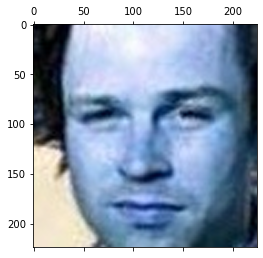

In [12]:
images_train=np.array(images_train)
plt.matshow(images_train[9])


#### Displaying some of the images in the images_train using cv2 funtion imshow() along with the labels of an image

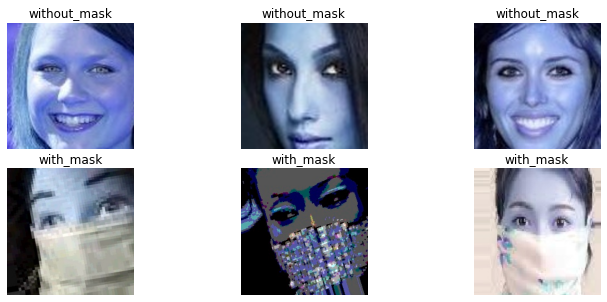

In [13]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*6500 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_train[image_index], cmap='gray')
        ax[r,c].set_title(train_df['labels'][image_index])
plt.show()
plt.close()

#### Creating a dataframe which contains the image labels, path of the testing dataset
Similarly like training dataset we need to load testset images and preprocessing images

In [ ]:
path2=r"C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\test/"

images = [[fname, path2+ fname[:-4] + '.jpg'] for fname in testing_labels['filename']]
test_df = pd.DataFrame(images)
test_df.columns = ['filename', 'file']

#### 1. Reading each of the testing images in the dataframe using the path specified in the 'file' column in a loop using cv2 function imread and resized the images to (224,224) and appended the images to the images_test list
#### 2. Also using the interpolation method inter_cubic, because cv2.INTER_CUBIC is slow but more efficient.

In [15]:
images_test=[]
for img in test_df['file']:
    img=cv2.imread(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_CUBIC)
    images_test.append(img)

#### To get the pixel values of the images in images_test list, Converting it into the numpy array and assign it back to the images_test and Displaying one of the images in the images_test

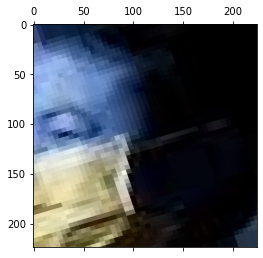

In [16]:
images_test=np.array(images_test)
plt.matshow(images_test[1])


#### Displaying some of the images in the images_test using cv2 funtion imshow() 

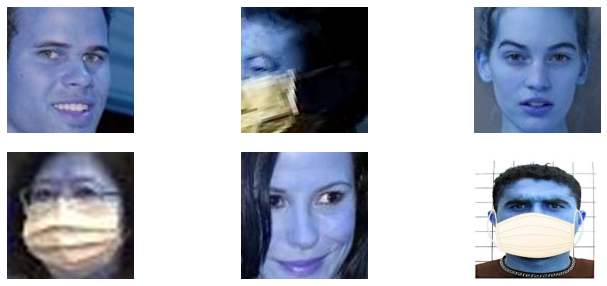

In [17]:
num_rows, num_cols = 2,3
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.15, 'hspace':0.15}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r*200 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(images_test[image_index], cmap='gray')
        
plt.show()
plt.close()

#### Checking the shape of the images_train and images_test. Also, printing one of the images in the images_train to see the pixel values distribution

In [18]:
images_train.shape

(11264, 224, 224, 3)

In [19]:
images_test.shape

(1536, 224, 224, 3)

In [20]:
images_train[0]

array([[[ 75,  76, 219],
        [ 75,  76, 218],
        [ 75,  76, 217],
        ...,
        [ 28,  38,  75],
        [ 27,  38,  76],
        [ 27,  38,  77]],

       [[ 77,  78, 220],
        [ 77,  78, 220],
        [ 77,  78, 219],
        ...,
        [ 26,  35,  72],
        [ 26,  37,  75],
        [ 27,  38,  76]],

       [[ 79,  81, 223],
        [ 79,  81, 222],
        [ 80,  81, 222],
        ...,
        [ 21,  30,  67],
        [ 25,  35,  73],
        [ 27,  38,  76]],

       ...,

       [[ 79,  73, 218],
        [ 79,  73, 218],
        [ 79,  73, 216],
        ...,
        [ 26,  40,  82],
        [ 16,  27,  68],
        [ 10,  19,  60]],

       [[ 78,  73, 218],
        [ 80,  75, 220],
        [ 83,  79, 222],
        ...,
        [ 28,  42,  85],
        [ 18,  28,  71],
        [ 12,  20,  63]],

       [[ 78,  73, 218],
        [ 81,  76, 221],
        [ 86,  82, 225],
        ...,
        [ 30,  43,  87],
        [ 19,  29,  73],
        [ 13,  21,  64]]


### Here comes the major part of the project. It's model selection. 
For this problem. I have used Transfer Learning Model (Densenet169)



#### Downloading the densenet169 from tf.keras.applications with weights as imagenet and include_top =false so that we can add our own dense layers at the end and the input shape with the shape mentioned in the INPUT_SHAPE variable

In [21]:
# define input shape
INPUT_SHAPE = (224,224,3)

# get the densenet169 model
vgg_layers = tf.keras.applications.densenet.DenseNet169(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)
# ignore the variable name as vgg_layers as I reused my first code for all the other models by changing the pretrained modelsto check how each pretrained models work

#print the summary and architecture of densenet169 layers
vgg_layers.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

conv5_block31_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block31_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block31_concat (Concatena (None, 7, 7, 1632)   0           conv5_block30_concat[0][0]       
                                                                 conv5_block31_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block32_0_bn (BatchNormal (None, 7, 7, 1632)   6528        conv5_block31_concat[0][0]       
__________________________________________________________________________________________________
conv5_block32_0_relu (Activatio (None, 7, 7, 1632)   0           conv5_block32_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block32_1_conv (Conv2D)   (None, 7, 7, 128)    208896      conv5_block32_0_relu[0][0]       
__________

#### Fine tuning the model by resuing already trained model by keeping layer.trainable set to False

In [22]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000262964E46A0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000002629651F910> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002629651FD90> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002629651FA30> False
<tensorflow.python.keras.layers.core.Activation object at 0x00000262968E3850> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000026296903BE0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002629F4970A0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002629F4F7BE0> False
<tensorflow.python.keras.layers.core.Activation object at 0x000002629F4FE490> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002629F504BB0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object

<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000026416264CD0> False
<tensorflow.python.keras.layers.core.Activation object at 0x000002641626B790> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002641626B160> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002641627DDC0> False
<tensorflow.python.keras.layers.core.Activation object at 0x00000264162A00A0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000264162A0700> False
<tensorflow.python.keras.layers.merge.Concatenate object at 0x00000264162B1550> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000264162D2D90> False
<tensorflow.python.keras.layers.core.Activation object at 0x00000264162DB220> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000264162DB8B0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000

# 3) Building a Model

### Here I use 
#### 1) Adam as the optimizer with the very less learning rate(2e-5) so that model will be trained very slowly and wont miss the global minima (Also I tried the RMSprop, it also gave the good accuracy with the same learning rate)
#### 2) Activation function as relu, as we all know the thumb rule that we should relu or leaky relu in the intermediate layers, so i tried with relu activation function also it has differentiable and non linearity functions
#### 3) No of neurons is again an trail and error method that I tried. with 64,128,512 neurons in the hidden layers. I got good accuracy with 64.
#### 4) Loss as sparse_categorical_crossentropy - it gave the good results. 
 I created the sequntial model and added the densenet169 layers to it.  Then, I flattened it so that I can give the inputs to the densely connected layers at the end. Followed by the flatten layers, I added two hidden layers and one output layer with 2 neurons, since we have two output as( 0 or 1) and used softmax as the activation function - it will give the probabilties for each categories in the ouput that we try to classify. I also tried with sigmoid. I dont feel it made much difference to the mdoel. Also used dropouts for regularization.

In [23]:
# import random
# from tensorflow.keras.optimizers import RMSprop

# # random.seed(21)
# print(random.random())
# define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.05))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.05))


# add output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
flatten (Flatten)            (None, 81536)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5218368   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1

#### converting the labels_num column in the train_df into the numpy array so that we can use it to fit the model

In [24]:
y=np.array(train_df['labels_num'])

In [25]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

#### Spliting the data into train and validation set  90:10 ratio using sklearn.model_selection

In [26]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(train_df, test_size=0.10, random_state=1337)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [27]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

# 4) Data Augumentation

#### Augumenting the images with ImageData Generator from tf.keras.preprocessing.image with the following trainsformations from rescaling to flipping

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


#### Augumenting the training images with the different transformations that I created above with the batch size as 32 and class mode as binary since we have two output classes

Since, I m reading all the images using train_df dataframe 'filepath' column - Using flow_from_dataframe method instead of flow_from_directory

In [29]:



train_generator = train_datagen.flow_from_dataframe(train_df,r'C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\train/',
                                             x_col='filename',y_col='labels',class_mode='binary',
                                   batch_size=32, target_size=(224,224),shuffle=False)

Found 10137 validated image filenames belonging to 2 classes.







#### Creating the validation datagenerator only for rescaling images in the Validation dataset without augumenting the images

In [30]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r'C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\train/',
                                             x_col='filename',y_col='labels',class_mode='binary',
                                   batch_size=32, target_size=(224,224),shuffle=False)



Found 1127 validated image filenames belonging to 2 classes.


#### Displaying some of the images in the train_generator

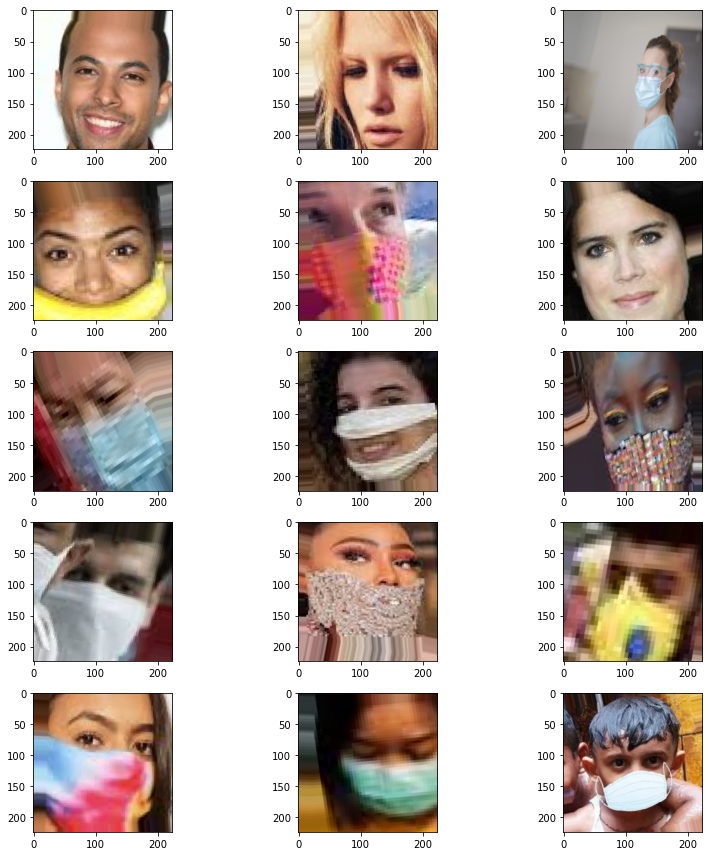

In [31]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#### Checking how images are augumented with the sample data

In [32]:
example_df = train_df.sample(n=2).reset_index(drop=True)
example_df.head()
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    r'C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\train/', 
    x_col='filename',
    y_col='labels',
    target_size=(224,224),
    class_mode='categorical'
)


Found 2 validated image filenames belonging to 2 classes.


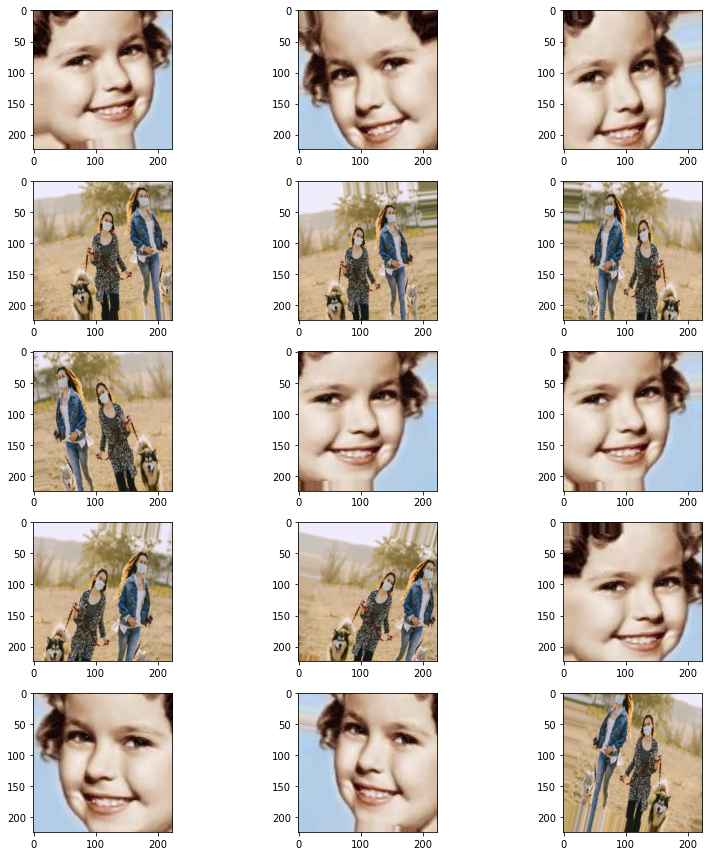

In [33]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 5) Training a Model

####  Fitting the model upto 5 epochs with patience = 2. If the val_loss does not have any improvement for more than two epocs, it will automatically save the model with the best_weights 
As it shows like 99.8% accuracy on training dataset and 99.6% accuracy on validation dataset, I got an accuracy of around 99.8% on testing dataset. So the model is not overfitting/underfitting 

In [34]:
EPOCHS = 5
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=[es_callback]
)


Epoch 1/5
316/316 [==============================] - 1683s 5s/step - loss: 0.0421 - accuracy: 0.9856 - val_loss: 0.0177 - val_accuracy: 0.9946
Epoch 2/5
316/316 [==============================] - 2160s 7s/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0211 - val_accuracy: 0.9946
Epoch 3/5
316/316 [==============================] - 3999s 13s/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 0.0115 - val_accuracy: 0.9964
Epoch 4/5
316/316 [==============================] - 2566s 8s/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0253 - val_accuracy: 0.9946
Epoch 5/5
316/316 [==============================] - 2399s 8s/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0164 - val_accuracy: 0.9964
Epoch 00005: early stopping


# 6) Plotting curves

#### Plotting the loss and accuracy curves of training and validation data

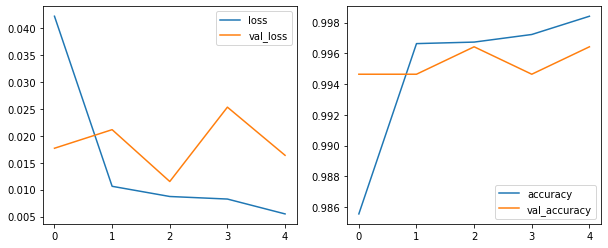

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

#### Creating the test datagenerator only for rescaling images in the test dataset without augumenting the images

In [36]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r'C:\Users\Meena\Desktop\Dphi\Datathons\Sprint 6\face_mask_detection\test/', 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(224,224),
    batch_size=batch_size,
    shuffle=False
)

Found 1536 validated image filenames.


# 7) Predicting the unseen data with the model that I trained with the training dataset

In [37]:
y_predict=model.predict(test_generator)


#### As softmax produces the probabilities of the ouput classes, I have used numpy.argmax() function to get the maximum probabilities index

In [38]:
final=[]
for i in range(0,len(images_test)):
    final.append(np.argmax(y_predict[i]))
    

#### Here you can see the final output index values. In my model I mentioned '0' as 'mucca' and '1' as 'pecora' in the train_df labels_num column. 

In [39]:
final

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


# 8) Submission

#### Creating the dataframe with string values by replacing the indices values with mucca and pecora

In [40]:
g=pd.DataFrame(final)
g[0]=g[0].replace({1:'without_mask',0:'with_mask'})
g

,0
0,without_mask
1,with_mask
2,without_mask
3,without_mask
4,with_mask
...,...
1531,with_mask
1532,with_mask
1533,with_mask
1534,with_mask


#### Converting the dataframe to csv for submission. I submitted this model's output and got an accuracy of 99.8 % in the leaderboard

In [41]:
submission = g 
submission.columns = ["prediction"]
submission.to_csv("face6.csv")

### Saving the model

In [42]:
model.save_weights("face2_99_80.h5") 

In [43]:
model.save('saved_model/my_model_99_80')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model_99_80\assets


#### Achieved accuracy of around 99.8 % on testdataset with this model 